<a href="https://colab.research.google.com/github/AlessandroPiva06/Bacheca/blob/main/LinearRegression_Piva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from mpl_toolkits.mplot3d import Axes3D

## **Single variable Linear Regression with random generated Training Dataset**
### **Gradient Descent**  

1. **Training Set creation**  
Generate an array with shape `(500,)` of **features** values $x$ in range (0,20), then generate a corresponding array of **labels** $y$ based on $y = 5x - 2$ formula. Add some noise to each $y$ value to spread data and finally plot data to visualize them.

In [52]:
rnstate = np.random.RandomState(1)

features= 20 * np.random.rand(500,)
labels=5*features-2
noise=rnstate.normal(0, 1.8, size=labels.shape[0])
labels = labels + noise
print(features, end='\n\n')
print(labels)

[1.33210672e+00 1.46395410e+01 1.83476011e+01 2.58502445e+00
 1.96885513e+01 1.22445560e+01 1.92800163e+01 1.15214207e+01
 1.62251868e+01 1.49165563e+01 5.36106080e+00 9.55310521e+00
 1.82037149e+01 1.56527386e+01 1.49196443e+01 3.29604127e+00
 7.87129157e+00 8.04653942e+00 2.96288101e+00 1.73066768e+01
 4.06631146e+00 8.96187141e+00 1.16954125e+01 7.10908492e+00
 9.83084244e+00 6.11500105e+00 1.75341924e+01 1.10603882e+01
 4.17597061e+00 1.57580547e+01 1.48746761e-01 1.39602883e+00
 7.75419977e+00 3.80260748e+00 5.49386578e+00 1.90994793e+01
 7.85705358e+00 1.70771322e+01 1.28033118e+01 1.43831328e+01
 7.50025725e+00 1.73734740e+01 1.49891690e+01 7.69449295e+00
 1.59992510e+00 5.84153136e+00 2.23166728e-01 1.15944053e+01
 2.90375219e+00 1.47901446e+01 1.45318727e+01 1.94409973e+01
 1.57669974e+00 1.63379447e+01 1.85453237e+01 8.26000084e+00
 5.99840624e+00 1.37847058e+01 1.82002977e+01 7.68346404e+00
 1.41087345e+01 1.80635810e+01 4.66728080e+00 1.84546759e+01
 1.15001453e+01 8.905690

2. **Gradient Descent algorithm implementation**  
Implement GD algorithm:  
2.1. initialize parameters $\theta_0$ and $\theta_1$ to some value (for example, 0);  
2.2. apply model $h_\theta(x)$ and calculate $y_{predicted} = h_\theta(x) = \theta_0 + \theta_1 x$;  
2.3. update $\theta$ parameters using the GD formulas:  
$\theta_0 = \theta_0 - \alpha [-\frac{1}{m} \displaystyle\sum_{i=1}^{m} (y^{(i)} -y_{predicted}^{(i)})]$  
$\theta_1 = \theta_1 - \alpha [-\frac{1}{m}\displaystyle\sum_{i=1}^{m} (y^{(i)} -y_{predicted}^{(i)})x^{(i)}]$;  
2.4. repeat points 2.2 and 2.3 for a suitable number of iterations;

In [53]:


m = labels.shape[0]

theta_0 = 0
theta_1 = 0
n_iterations = 1000
alpha = 0.01

cost_history = []

for i in range(n_iterations):
    y_predicted = theta_0 + theta_1 * features

    cost = (1/(2*m)) * np.sum((y_predicted - labels)**2)
    cost_history.append(cost)

    d_theta_0 = (1/m) * np.sum(y_predicted - labels)
    d_theta_1 = (1/m) * np.sum((y_predicted - labels) * features)

    theta_0 = theta_0 - alpha * d_theta_0
    theta_1 = theta_1 - alpha * d_theta_1

print(f"Final theta_0: {theta_0}")
print(f"Final theta_1: {theta_1}")
print(f"Final Cost: {cost_history[-1]}")

Final theta_0: -1.8167826612308815
Final theta_1: 4.996082642217012
Final Cost: 1.5854307604105495


3. **Final model evaluation**  
Plot the training set data vs the data calculated using the model trained by GD algorithm. Also show the main model metrics: **mean absolute** error, **mean squared** error and **root mean squared** error.

Shape of features: (500,)
Shape of labels: (500,)


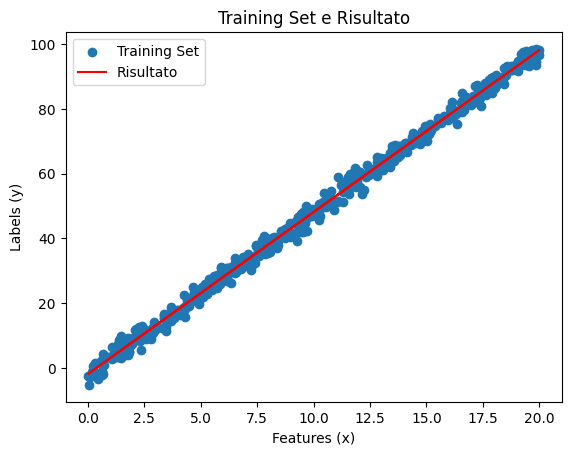

Mean Absolute Error (GD): 1.42
Mean Squared Error (GD): 3.17
Root Mean Squared Error (GD): 1.78


In [54]:
print(f"Shape of features: {features.shape}")
print(f"Shape of labels: {labels.shape}")

plt.scatter(features, labels, label='Training Set')
plt.plot(features, theta_0 + theta_1 * features, color='red', label='Risultato')
plt.xlabel('Features (x)')
plt.ylabel('Labels (y)')
plt.title('Training Set e Risultato')
plt.legend()
plt.show()

y_predicted_gd = theta_0 + theta_1 * features

mae_gd = metrics.mean_absolute_error(labels, y_predicted_gd)
mse_gd = metrics.mean_squared_error(labels, y_predicted_gd)
rmse_gd = np.sqrt(mse_gd)

print(f"Mean Absolute Error (GD): {mae_gd:.2f}")
print(f"Mean Squared Error (GD): {mse_gd:.2f}")
print(f"Root Mean Squared Error (GD): {rmse_gd:.2f}")

4. **Learning curve**  
Add cost function evaluation to each GD step then plot cost values vs the iteration count. How fast does your model converges?

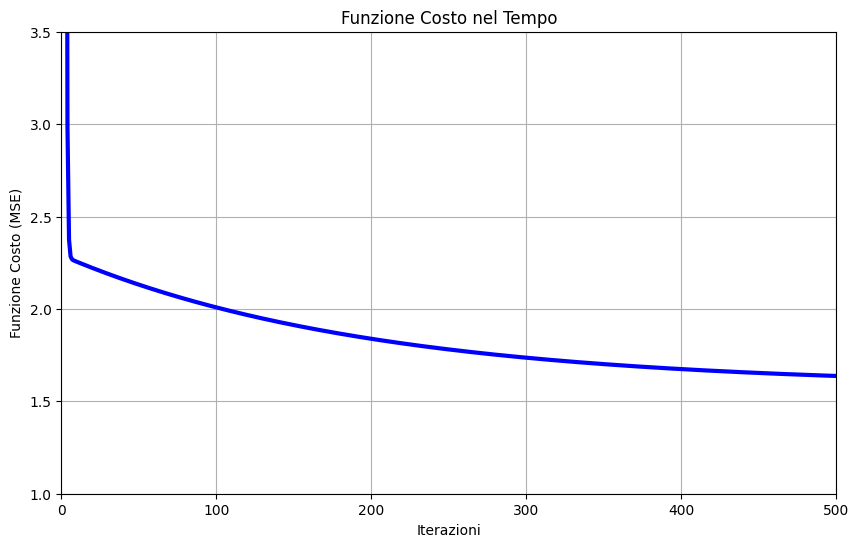

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), cost_history, color='blue', linewidth=3)
plt.xlabel('Iterazioni')
plt.ylabel('Funzione Costo (MSE)')
plt.title('Funzione Costo nel Tempo')
plt.grid(True)
plt.ylim(1,3.5)
plt.xlim(0, 500)
plt.show()

### **Linear Regression model**
Now, you can try the `LinearRegression` model optimizer from `scikit-learn`: this model implement the ordinary least squares linear regression optimization.  

Instantiate the `LinearRegression` class, fit the model using the same Training set you used with GD and compare the results.

Regressione Lineare - Intercetta (theta_0): -2.00
Regressione Lineare - Coefficiente (theta_1): 5.01
Errore Assoluto Medio: 1.42
Errore Quadratico Medio: 3.16
Errore Quadratico Medio Radice: 1.78


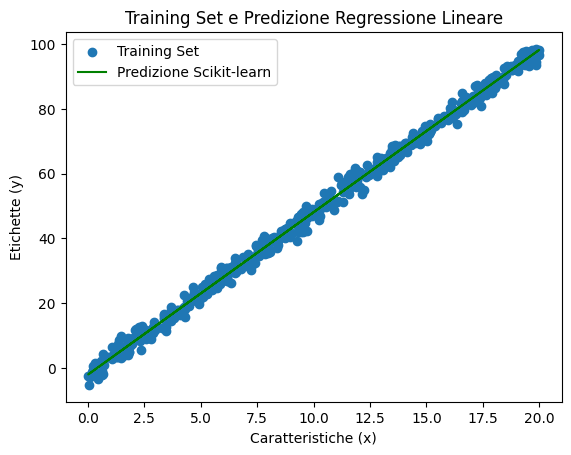

In [56]:
lin_reg_model = LinearRegression()

features_reshaped = features.reshape(-1, 1)

lin_reg_model.fit(features_reshaped, labels)

y_predicted_sklearn = lin_reg_model.predict(features_reshaped)

theta_0_sklearn = lin_reg_model.intercept_
theta_1_sklearn = lin_reg_model.coef_[0]

print(f"Regressione Lineare - Intercetta (theta_0): {theta_0_sklearn:.2f}")
print(f"Regressione Lineare - Coefficiente (theta_1): {theta_1_sklearn:.2f}")

mae_sklearn = metrics.mean_absolute_error(labels, y_predicted_sklearn)
mse_sklearn = metrics.mean_squared_error(labels, y_predicted_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)

print(f"Errore Assoluto Medio: {mae_sklearn:.2f}")
print(f"Errore Quadratico Medio: {mse_sklearn:.2f}")
print(f"Errore Quadratico Medio Radice: {rmse_sklearn:.2f}")

plt.scatter(features, labels, label='Training Set')
plt.plot(features, theta_0_sklearn + theta_1_sklearn * features, color='green', label='Predizione Scikit-learn')
plt.xlabel('Caratteristiche (x)')
plt.ylabel('Etichette (y)')
plt.title('Training Set e Predizione Regressione Lineare')
plt.legend()
plt.show()

### ***SGD Regression model**  
Finally you can also try the `SDGRegressor` from `scikit-learn`, which implement a Stochastic GD algorithm.  

Instantiate the `SGDRegressor` class, fit the model using the same Training set you used with GD and compare the results.

SGD Regressor - Intercetta (theta_0): -1.93
SGD Regressor - Coefficiente (theta_1): 5.02
Errore Assoluto Medio: 1.43
Errore Quadratico Medio: 3.19
Errore Quadratico Medio Radice: 1.78


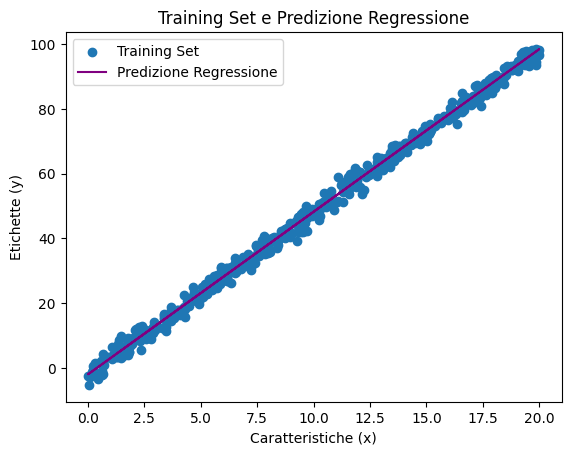

In [57]:
sgd_reg_model = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)

features_reshaped = features.reshape(-1, 1)

sgd_reg_model.fit(features_reshaped, labels)

y_predicted_sgd = sgd_reg_model.predict(features_reshaped)

theta_0_sgd = sgd_reg_model.intercept_[0]
theta_1_sgd = sgd_reg_model.coef_[0]

print(f"SGD Regressor - Intercetta (theta_0): {theta_0_sgd:.2f}")
print(f"SGD Regressor - Coefficiente (theta_1): {theta_1_sgd:.2f}")

mae_sgd = metrics.mean_absolute_error(labels, y_predicted_sgd)
mse_sgd = metrics.mean_squared_error(labels, y_predicted_sgd)
rmse_sgd = np.sqrt(mse_sgd)

print(f"Errore Assoluto Medio: {mae_sgd:.2f}")
print(f"Errore Quadratico Medio: {mse_sgd:.2f}")
print(f"Errore Quadratico Medio Radice: {rmse_sgd:.2f}")

plt.scatter(features, labels, label='Training Set')
plt.plot(features, theta_0_sgd + theta_1_sgd * features, color='purple', label='Predizione Regressione')
plt.xlabel('Caratteristiche (x)')
plt.ylabel('Etichette (y)')
plt.title('Training Set e Predizione Regressione')
plt.legend()
plt.show()

## **Multivariate Linear Regression with random generated Training Dataset**
### **Gradient Descent**

1. **Training set creation**  
This time you have to generate two array of features $x_1$ and $x_2$ and a corresponding array of labels $y$, using some linear formula. Add some noise to each $y$ value to spread data. Also plot your data so that you can visualize them.

In [58]:
rnstate = np.random.RandomState(1)
x1=rnstate.randint(500) *20
x2=rnstate.randint(500) *10

y=7 * x1 + 5 * x2 - 3





Now, prepare the **feature matrix**:  
$X = \begin{bmatrix}
x_0^{(1)} & x_1^{(1)} & x_2^{(1)} \\
x_0^{(2)} & x_1^{(2)} & x_2^{(2)} \\
... \\
x_0^{(m)} & x_1^{(m)} & x_2^{(m)} \\
\end{bmatrix}$

where the $x_0$ column is made by values that all equal 1.


In [59]:
'''add your code here'''


'add your code here'

2. **Gradient Descent**  
Now you have to implement the vectorized version of the GD algorithm:  
2.1. initialize a vector of $\theta$ parameters $\Theta = \begin{bmatrix} \theta_0 & \theta_1 & \theta_2 \\ \end{bmatrix}$;  
2.2. apply model $h_\theta(X)$ and calculate $y_{predicted} = h_\theta(X) = (X @ \Theta^T)^T$. Please note that the external transposition operator is needed to transform $y_{predicted}$ into an horizontal array;  
2.3. update $\Theta$ using the GD vectorized formula: $\Theta = \Theta - \alpha [-\frac{1}{m}(y - y_{predicted})@X]$;  
2.4. repeat points 2.2 and 2.3 for a suitable number of iterations.

In [60]:
#Gradient Descent
m = labels.shape[0]        #number of training samples

n_iterations = 1000   #number of GD cycles
alpha = 0.01          #learning-rate
'''add your code here'''


'add your code here'

3. **Final and further evaluations**  
Plot your model predicted values and compare them with the true $y$ values, then compute the model metrics. You can finally try comparison with the `scikit-learn` models.

In [61]:
'''add your code here'''


'add your code here'